# Bollywood Dta Analysis

## by Shailaja

## Preliminary Wrangling

     The data file bollywood.csv contains box office collection and social media promotion information about movies released in 2013 – 2015 period. 

In [21]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df=pd.read_csv("bollywood.csv")

In [28]:
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [29]:
df.columns

Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes'],
      dtype='object')

# What is the structure of the dataset?

    SlNo – Release Data
    MovieName – Name of the movie
    ReleaseTime – Mentions special time of release. LW (Long Weekend), FS (Festive Season), HS (Holiday Season), N (Normal)
    Genre – Genre of the film such as Romance, Thriller, Action, Comedy, etc..
    Budget – Movie creation budget
    BoxOfficeCollection – Box Office collection
    YoutubeViews – Number of views of the YouTube trailers
    YoutubeLikes – Number of likes of the YouTube trailers
    YoutubeDislikes – Number of dislikes of the YouTube trailers

    
    
    
      
  
  

#  How many records are present in the dataset? Print the metadata information of the dataset. 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


#  How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order. 

In [31]:
df["Genre"].value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

    There are,
    Comedy 36 movies ,Drama 35 movies,Thriller 26 movies,Romance 25 movies,Action 21 movies,Thriller 3 movies,Action 3 movies
    In that,Comedy genre had highest releases.
    And,value_counts() method by default return count in descending order. so, we can observe descending order in above 
    output.


# How many movies in each genre got released in different release times like long weekend, festive season, etc..

In [32]:
df.groupby(["Genre"])["ReleaseTime"].value_counts()

Genre      ReleaseTime
 Drama     N              24
           HS              6
           FS              4
           LW              1
Action     N              12
           FS              3
           HS              3
           LW              3
Action     N               3
Comedy     N              23
           HS              5
           LW              5
           FS              3
Romance    N              15
           LW              4
           FS              3
           HS              3
Thriller   N              20
           FS              4
           HS              1
           LW              1
Thriller   N               2
           LW              1
Name: ReleaseTime, dtype: int64

    In Drama Genre, 24 movies are released in N (Normal), 6 movies are released in HS (Holiday Season), 4  movie is released in  FS (Festival Season), 1 movie is released in  LW (Long Weekend).
    
    In Action Genre, 12 movies are released in N (Normal), 3 movies are released in HS (Holiday Season), 3  movie is released in  FS (Festival Season), 3 movie is released in  LW (Long Weekend).
    
    
    In Drama Genre, 24 movies are released in N (Normal), 6 movies are released in HS (Holiday Season),  movie is released in  FS (Festival Season), 1 movie is released in  LW (Long Weekend).
    .
    .
    .
    etc

#  Which month of the year, maximum number movie releases are seen? (Extract month component from ReleaseDate column)

In [33]:
df["Release Date"] = pd.to_datetime(df["Release Date"])


In [34]:
df['Release Month']=df['Release Date'].dt.strftime('%B')

In [35]:
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Release Month
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,April
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,January
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,July
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,January
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,July
...,...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,February
145,146,2015-03-13,NH10,N,Thriller,13,32.10,5592977,15464,1513,March
146,147,2015-03-20,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,March
147,148,2015-03-20,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,March


In [36]:
df["Release Month"].value_counts()

January      20
March        19
May          18
July         16
February     16
April        11
September    10
June         10
November     10
October       9
August        8
December      2
Name: Release Month, dtype: int64

We can observe that, in January month maximun number of movies are released

#  Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [37]:
df[df["Budget"]>=25]["Release Month"].mode()

0    February
dtype: object

In february month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more

#  Which are top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget)/Budget

In [38]:
df["ROI"]=(df["BoxOfficeCollection"]-df["Budget"])/df["Budget"]


In [39]:
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Release Month,ROI
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,April,1.888889
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,January,0.200000
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,July,-0.600000
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,January,-0.950000
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,July,-0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,February,1.000000
145,146,2015-03-13,NH10,N,Thriller,13,32.10,5592977,15464,1513,March,1.469231
146,147,2015-03-20,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,March,-0.625000
147,148,2015-03-20,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,March,1.378000


In [40]:
df.sort_values(by=["ROI"],ascending=False).head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Release Month,ROI
64,65,2013-04-26,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,April,8.166667
89,90,2014-12-19,PK,HS,Drama,85,735.0,13270623,43767,5693,December,7.647059
132,133,2013-09-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,September,7.514286
135,136,2013-09-20,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,September,7.500000
87,88,2013-06-14,Fukrey,N,Comedy,5,36.2,227912,222,39,June,6.240000
58,59,2014-09-05,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,September,5.933333
128,129,2013-10-18,Shahid,FS,Drama,6,40.0,1148516,3155,396,October,5.666667
37,38,2014-07-11,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,July,5.500000
101,102,2013-07-12,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,July,4.466667
115,116,2013-08-09,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,August,4.266667


#  Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [41]:
df.groupby("ReleaseTime")["ROI"].mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

Movies which are released on LW(Long Weeked) have higher ROI

# Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.

Text(0.5, 1.0, 'distribution of movie budgets')

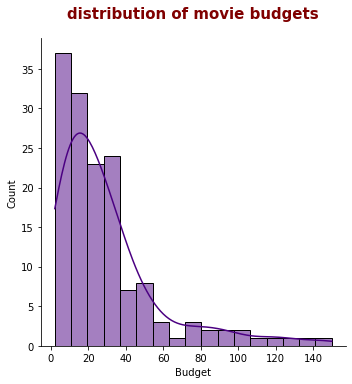

In [42]:
sns.displot(data=df, x="Budget", kde=True,color="indigo")
plt.title("distribution of movie budgets",color="maroon",fontsize=15,fontweight="bold",pad=20)

In [43]:
df.columns

Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'Release Month', 'ROI'],
      dtype='object')

Text(0, 0.5, 'Frequency')

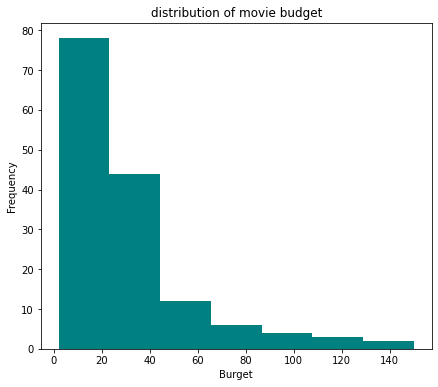

In [44]:
plt.figure(figsize=(7,6))
plt.hist(df["Budget"],color="teal",bins=7)
plt.title("distribution of movie budget")
plt.xlabel("Burget")
plt.ylabel("Frequency")

Based on above histogram we can say that,comapring to high burget movies, low burget movies are very high

#  Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?


In [ ]:
plt.scatter(df["BoxOfficeCollection"],df['YoutubeLikes'],color="navy")
plt.title("distribution of movie budget")
plt.xlabel("Burget")
plt.ylabel("")

#  Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

In [ ]:
df.groupby("Genre")["YoutubeLikes"].sum().sort_values(ascending=False)

So, Action genre have the highest likes

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df["Genre"],y=df["YoutubeLikes"],whis=2.5)

In [ ]:
df["Genre"].unique()

Action Genre movies have the highest likes,and it also contain outliers.

Thriller and

#  Which of the variables among Budget, BoxOfficeCollection , YoutubeView, Youtubelikes, YoutubeDislikes are likely correlated? Noted: Draw pair plot or heatmap.

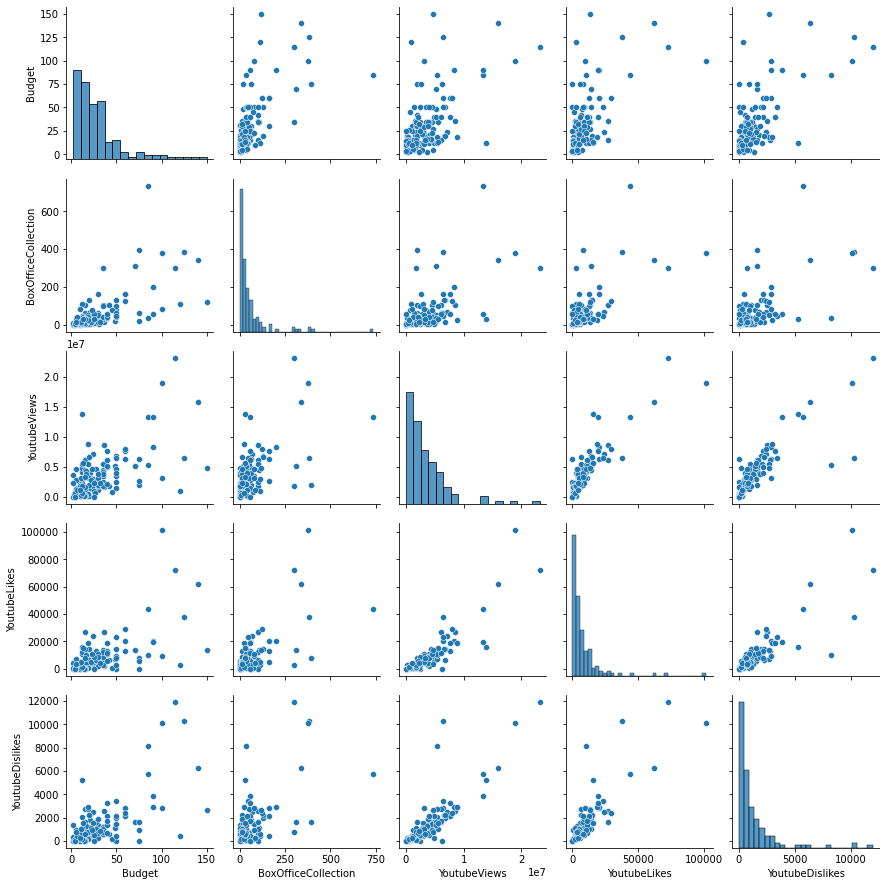

In [46]:
sns.pairplot(df[["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"]])